In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html, "lxml")
type(soup)

bs4.BeautifulSoup

In [5]:
title = soup.title
print(title)

<title>Race results for the 2017 Intel Great Place to Run \ Urban Clash Games!</title>


In [6]:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))


mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2017GPTR
/results/team/2017GPTR
/results/team/2017GPTR10K
/results/summary/2017GPTR10K
None
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/
None


In [7]:
# Print out the text
text = soup.get_text()
# print(soup.text)

In [8]:
rows = soup.find_all('tr')
# rows= rows[:10]
# print(rows[:10])

In [9]:
for row in rows:
    row_td = row.find_all('td')
print (row_td)
print(type(row_td))

[<td>577</td>, <td>443</td>, <td>

                    LIBBY B MITCHELL

                </td>, <td>F</td>, <td>HILLSBORO</td>, <td>OR</td>, <td>1:41:18</td>, <td>16:20</td>, <td>1:42:10</td>, <td></td>]
<class 'bs4.element.ResultSet'>


In [10]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells,"lxml").get_text()
print(cleantext)

[577, 443, 

                    LIBBY B MITCHELL

                , F, HILLSBORO, OR, 1:41:18, 16:20, 1:42:10, ]


In [11]:
list_rows = []
for row in rows:
    row_td =row.find_all('td')
    str_cells = str(row_td)
    cleantext = BeautifulSoup(str_cells,"lxml").get_text()
    list_rows.append(cleantext)
# print(cleantext)

In [12]:
df = pd.DataFrame(list_rows)
df

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
...,...
577,"[573, 273, \r\n\r\n RACHEL ..."
578,"[574, 467, \r\n\r\n ROHIT B..."
579,"[575, 471, \r\n\r\n CENITA ..."
580,"[576, 338, \r\n\r\n PRANAVI..."


In [13]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,[],None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None
5,[1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,[2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,[3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,[4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,[5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [14]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,]
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,]
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,]
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...


In [15]:
all_header = []
col_str = str(soup.find_all('th'))
clean_text = BeautifulSoup(col_str).get_text()
all_header.append(clean_text)
all_header

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gun Time, Team]']

In [16]:
df_header = pd.DataFrame(all_header)
df_header

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [17]:
df3 = df_header[0].str.split(',', expand=True)
df3

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]


In [18]:
df4 = pd.concat([df3,df1])
df4

,0,1,2,3,4,5,6,7,8,9
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
577,573,273,\r\n\r\n RACHEL L VANEY\r\...,F,OTHER,OR,1:38:17,15:51,1:38:34,]
578,574,467,\r\n\r\n ROHIT B DSOUZA\r\...,M,PORTLAND,OR,1:38:31,15:53,1:40:32,\n\r\n INTEL TEAM ...
579,575,471,\r\n\r\n CENITA D'SOUZA\r\...,F,PORTLAND,OR,1:38:32,15:53,1:40:34,]
580,576,338,\r\n\r\n PRANAVI APPANA\r\...,F,HILLSBORO,OR,1:40:47,16:15,1:42:01,]


In [19]:
df5 = df4.rename(columns= df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None


In [20]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 581
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   [Place      583 non-null    object
 1    Bib        581 non-null    object
 2    Name       578 non-null    object
 3    Gender     578 non-null    object
 4    City       578 non-null    object
 5    State      578 non-null    object
 6    Chip Time  578 non-null    object
 7    Chip Pace  578 non-null    object
 8    Gun Time   578 non-null    object
 9    Team]      578 non-null    object
dtypes: object(10)
memory usage: 50.1+ KB


In [21]:
df6 = df5.dropna(axis=0, how='any')
df6 = df6.drop(df6.index[0])
df6.rename(columns={"[Place": "Place", " Team]":"Team"}, inplace=True)


In [22]:
df6['Team']=df6["Team"].str.strip(']')
df6

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,\r\n\r\n JARED WILSON\r\n\...,M,TIGARD,OR,36:21,5:51,36:24,
6,2,573,\r\n\r\n NATHAN A SUSTERSI...,M,PORTLAND,OR,36:42,5:55,36:45,\n\r\n INTEL TEAM ...
7,3,687,\r\n\r\n FRANCISCO MAYA\r\...,M,PORTLAND,OR,37:44,6:05,37:48,
8,4,623,\r\n\r\n PAUL MORROW\r\n\r...,M,BEAVERTON,OR,38:34,6:13,38:37,
9,5,569,\r\n\r\n DEREK G OSBORNE\r...,M,HILLSBORO,OR,39:21,6:20,39:24,\n\r\n INTEL TEAM ...
...,...,...,...,...,...,...,...,...,...,...
577,573,273,\r\n\r\n RACHEL L VANEY\r\...,F,OTHER,OR,1:38:17,15:51,1:38:34,
578,574,467,\r\n\r\n ROHIT B DSOUZA\r\...,M,PORTLAND,OR,1:38:31,15:53,1:40:32,\n\r\n INTEL TEAM ...
579,575,471,\r\n\r\n CENITA D'SOUZA\r\...,F,PORTLAND,OR,1:38:32,15:53,1:40:34,
580,576,338,\r\n\r\n PRANAVI APPANA\r\...,F,HILLSBORO,OR,1:40:47,16:15,1:42:01,


In [23]:
df6 = df6.apply(lambda x: x.str.strip()).replace('', np.nan)
df6.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,NaN
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,NaN
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,NaN
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F


## Data Analysis and Visualization

In [24]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 577 entries, 5 to 581
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Place       577 non-null    object
 1    Bib        577 non-null    object
 2    Name       577 non-null    object
 3    Gender     577 non-null    object
 4    City       560 non-null    object
 5    State      560 non-null    object
 6    Chip Time  577 non-null    object
 7    Chip Pace  577 non-null    object
 8    Gun Time   577 non-null    object
 9   Team        80 non-null     object
dtypes: object(10)
memory usage: 49.6+ KB


In [25]:
time_list= df6[' Chip Time'].tolist()

time_mins = []
for i in time_list:
    math =0
    i =i.split(':')
    if(len(i) == 3):
       math = (int(i[0]) *3600 + int(i[1]) * 60 + int(i[2]))/60
    else:
        math = (int(i[0]) * 60 + int(i[1]))/60

    time_mins.append(math)
print(len(time_list))
    

577


In [30]:
df6['Runner_mins'] = time_mins
df6.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,36:24,NaN,36.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,36:45,INTEL TEAM F,36.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,37:48,NaN,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,38:37,NaN,38.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,39:24,INTEL TEAM F,39.350000


In [100]:
df6.describe()


,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


#### **The summary statistics according to gender**

The male gender have a lower average than the female gender, meaning that on average the males finish the race more than the females.

In [33]:
stats = df6.groupby(' Gender', as_index=True).describe()
print(stats)

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
F             163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
M             414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
F        72.058333  101.300000  
M        64.804167   98.516667  


In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

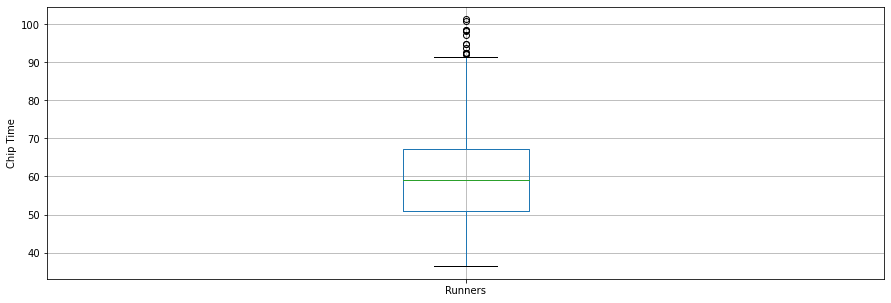

In [44]:
df6.boxplot(column="Runner_mins")
# plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])
plt.show()

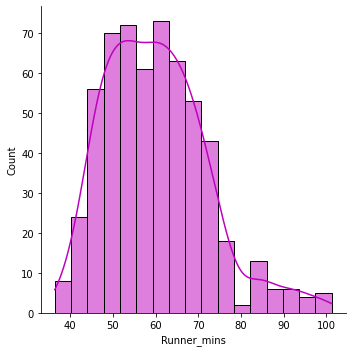

In [61]:
x = df6['Runner_mins']
ax = sns.displot(data=df6, x='Runner_mins',rug=False, kind='hist', kde=True, color='m' )
plt.show()

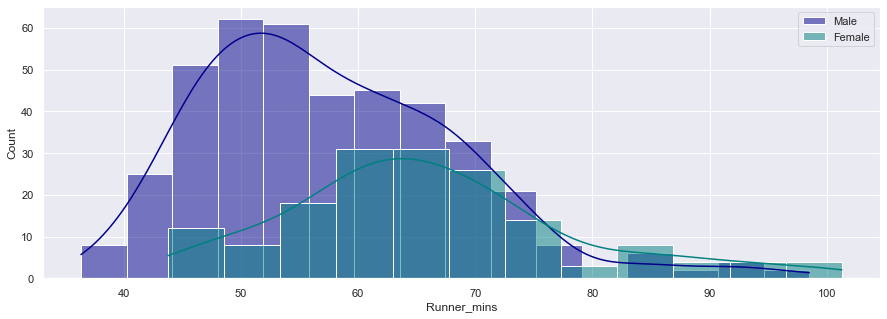

In [101]:
mrm = df6.loc[df6[' Gender'] == 'M']['Runner_mins']
frm = df6.loc[df6[' Gender']== 'F']['Runner_mins']

sns.set(style="darkgrid")
sns.histplot(data=df6, x=mrm,  kde=True, label='Male', color="darkblue")
sns.histplot(data=df6, x=frm,  kde=True, label='Female', color="teal")
plt.legend()
plt.show()

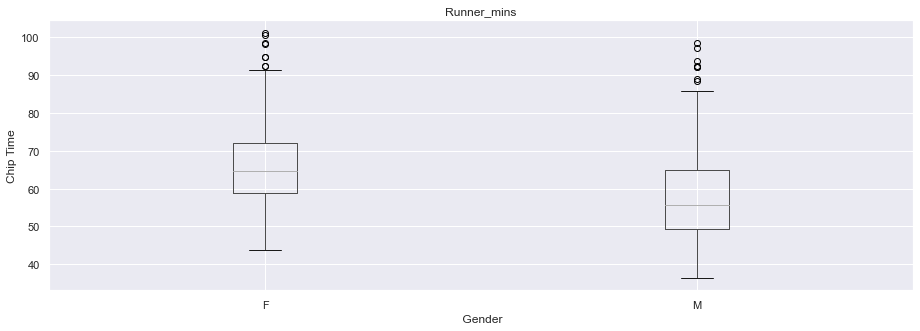

In [88]:
df6.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")
plt.show()